In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import random
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Read the data and perform preprocessing

df = pd.read_csv("data/food_crises_cleaned.csv") # Read data into 'df' dataframe
print(df.shape) # Print dataframe shape
df.index = df['date']
df.head(5)

(12324, 25)


,country,district_code,district,centx,centy,year_month,year,month,ipc,ha,...,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct,date
date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,South Sudan,74,Bor,32.00486,6.465644,2007_01,2007,1,NaN,NaN,...,0.048880,0,0,0.561363,14008.33,7.961984,239344.0,11393.76,90.8503,2007-01-01
2007-02-01,South Sudan,74,Bor,32.00486,6.465644,2007_02,2007,2,NaN,NaN,...,-0.457928,0,0,0.565693,14008.33,7.961984,239344.0,11393.76,90.8503,2007-02-01
2007-03-01,South Sudan,74,Bor,32.00486,6.465644,2007_03,2007,3,NaN,NaN,...,-0.590175,0,0,0.592437,14008.33,7.961984,239344.0,11393.76,90.8503,2007-03-01
2007-04-01,South Sudan,74,Bor,32.00486,6.465644,2007_04,2007,4,NaN,NaN,...,-1.845536,0,0,0.605352,14008.33,7.961984,239344.0,11393.76,90.8503,2007-04-01
2007-05-01,South Sudan,74,Bor,32.00486,6.465644,2007_05,2007,5,NaN,NaN,...,-2.972735,0,0,0.618699,14008.33,7.961984,239344.0,11393.76,90.8503,2007-05-01


In [5]:
# Drop null values
df = df.dropna()

In [6]:
# Drop the last column 'data' as it is already index
df = df.drop(columns=df.columns[-1])

In [18]:
df2 = df.loc[:, df.columns[6:]]

In [19]:
df2

,year,month,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
date,,,,,,,,,,,,,,,,,,
2012-04-01,2012,4,2.0,0.0,0.287093,96.74717,14.361340,1.197359,7.238667,1.602302,1,0,2.355737,14008.3300,7.961984,277671.0,11393.760,90.8503
2012-07-01,2012,7,2.0,0.0,0.662093,106.25330,36.469950,13.085090,27.570070,5.980510,0,0,2.208810,14008.3300,7.961984,277671.0,11393.760,90.8503
2012-10-01,2012,10,2.0,0.0,0.613904,101.37420,20.647180,3.301127,25.278460,6.753136,5,7,2.362269,14008.3300,7.961984,277671.0,11393.760,90.8503
2013-01-01,2013,1,1.0,0.0,0.314510,103.96520,0.329091,-0.032959,1.943753,1.321384,4,10,1.891807,14008.3300,7.961984,283876.0,11393.760,90.8503
2013-04-01,2013,4,2.0,0.0,0.286365,96.50182,10.711610,-2.452373,2.652064,-2.984301,3,2,1.785579,14008.3300,7.961984,283876.0,11393.760,90.8503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,2018,10,3.0,1.0,0.658442,109.45600,12.046950,-0.286235,15.575860,-1.224320,0,0,53.934660,757.7855,13.068690,118402.0,7145.909,85.5000
2019-02-01,2019,2,3.0,0.0,0.245634,99.63349,0.048424,0.001775,0.239924,0.031929,0,0,60.114030,757.7855,13.068690,102228.0,7145.909,85.5000
2019-06-01,2019,6,3.0,1.0,0.539870,114.87210,28.827110,9.613820,10.996420,1.992628,0,0,69.429000,757.7855,13.068690,102228.0,7145.909,85.5000


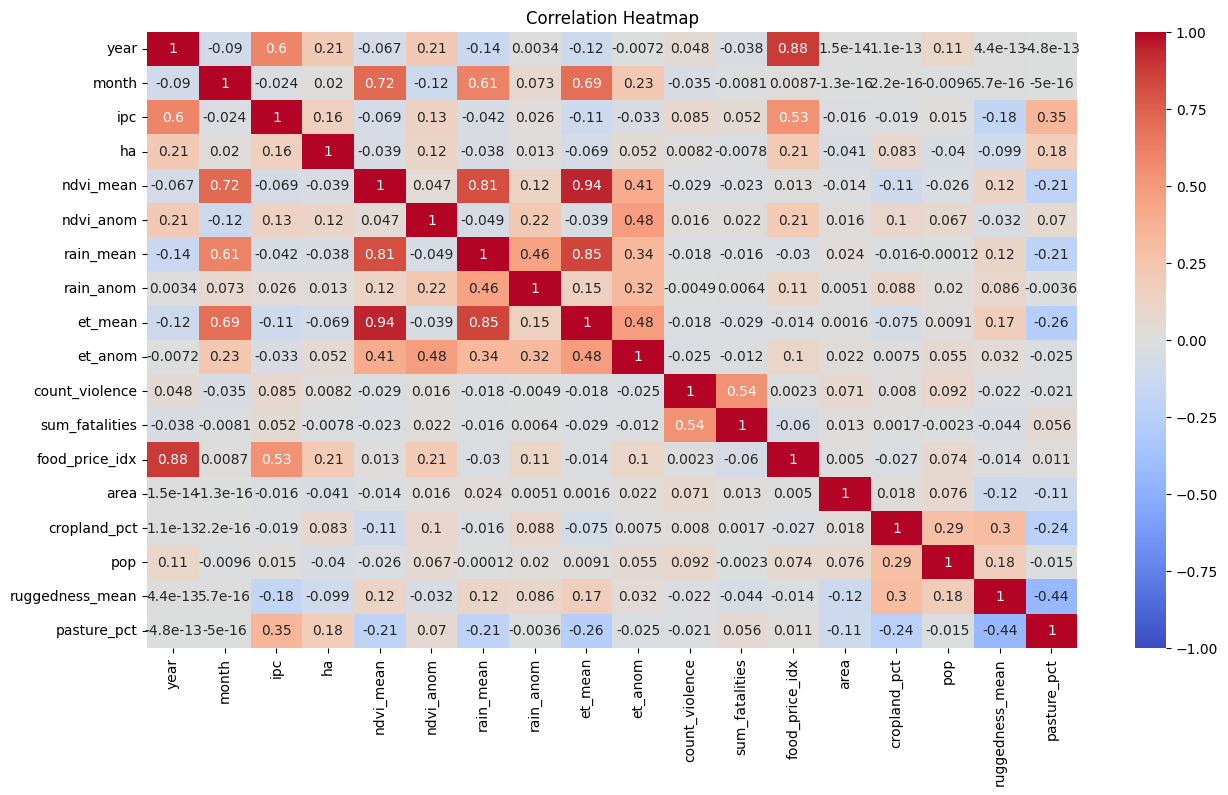

In [24]:
# Correlation map
# Plotting the heatmap
plt.figure(figsize=(15, 8))  # You can adjust the size if needed
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Create a new column indicating if the IPC is above 3 or below 3
# 0 indicates below 3; 1 indicates above 3
df2['ipc_indicator'] = (df['ipc'] > 3).astype(int)

In [27]:
grouped = df2.groupby('ipc_indicator')

In [29]:
mean_values = grouped.mean()
std_values = grouped.std()
mean_values

,year,month,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
ipc_indicator,,,,,,,,,,,,,,,,,,
0,2015.324014,5.770344,2.190714,0.135297,0.534124,104.925618,14.774737,0.894608,15.088711,1.895106,0.770344,3.660010,18.574903,8062.029058,18.590814,160367.715022,34597.492341,80.214256
1,2017.447514,5.524862,4.005525,0.016575,0.535699,107.774410,15.443560,1.388940,13.590443,1.676110,1.082873,6.668508,40.480258,8629.219334,18.341428,159153.906243,20479.778083,84.335880


In [36]:
results = {}
for column in df2.select_dtypes(include=['float64', 'int64']):
    group1 = df2[df2['ipc_indicator'] == 0][column]
    group2 = df2[df2['ipc_indicator'] == 1][column]
    
    if group1.empty or group2.empty:  # Check to ensure groups have data
        continue
    
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances
    results[column] = {'T-statistic': t_stat, 'P-value': p_value}

# Displaying results
for key, value in results.items():
    print(f"{key} -> T-statistic: {value['T-statistic']:.3f}, P-value: {value['P-value']:.3f}")

year -> T-statistic: -15.386, P-value: 0.000
month -> T-statistic: 1.065, P-value: 0.288
ipc -> T-statistic: -101.675, P-value: 0.000
ha -> T-statistic: 9.726, P-value: 0.000
ndvi_mean -> T-statistic: -0.125, P-value: 0.901
ndvi_anom -> T-statistic: -2.940, P-value: 0.004
rain_mean -> T-statistic: -0.697, P-value: 0.486
rain_anom -> T-statistic: -1.458, P-value: 0.146
et_mean -> T-statistic: 1.800, P-value: 0.073
et_anom -> T-statistic: 0.818, P-value: 0.414
count_violence -> T-statistic: -1.778, P-value: 0.077
sum_fatalities -> T-statistic: -1.652, P-value: 0.100
food_price_idx -> T-statistic: -9.690, P-value: 0.000
area -> T-statistic: -0.669, P-value: 0.504
cropland_pct -> T-statistic: 0.243, P-value: 0.808
pop -> T-statistic: 0.134, P-value: 0.893
ruggedness_mean -> T-statistic: 5.445, P-value: 0.000
pasture_pct -> T-statistic: -6.425, P-value: 0.000
